# Telco Customer Churn Prediction using ANN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Problem Statement - We are given a dataset which contains information about whether a customer will leave a telcom service or not {customer left means = Churn}

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df[pd.to_numeric(df.TotalCharges , errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.iloc[488]['TotalCharges']

' '

In [9]:
df_final = df[df['TotalCharges'] !=' ']
df_final.shape

(7032, 21)

In [10]:
df_final = df_final.drop(['customerID'] , axis=1)

In [11]:
## we see we have successfully removed the null value records

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [13]:
# converting datatype of Total charges to float again
df_final['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [14]:
### Now we see an important columns which is tenure which tells us about the loyalty of customers
tenure_churn_no = df_final[df_final.Churn =='No'].tenure

In [15]:
tenure_churn_yes = df_final[df_final.Churn == 'Yes'].tenure

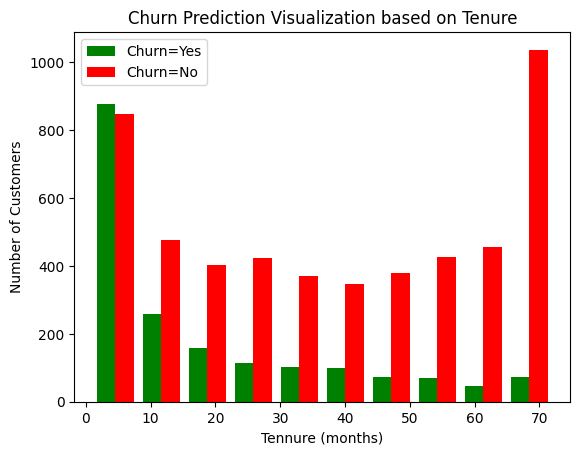

In [16]:
## Now we plot a histogram side by side to see which customer left or not and at which tennure
plt.xlabel('Tennure (months)')
plt.ylabel('Number of Customers')
plt.title('Churn Prediction Visualization based on Tenure')
plt.hist([tenure_churn_yes , tenure_churn_no] , color=['green' , 'red'] , label=['Churn=Yes' , 'Churn=No' ])
plt.legend()

In [17]:
### same type of visualizatio  we can get for monthly chrges ,  that is based on monthly charges is customers leaves or not
monthly_charge_churn_yes = df_final[df_final.Churn =='Yes'].MonthlyCharges
monthly_charges_churn_no = df_final[df_final.Churn == 'No'].MonthlyCharges

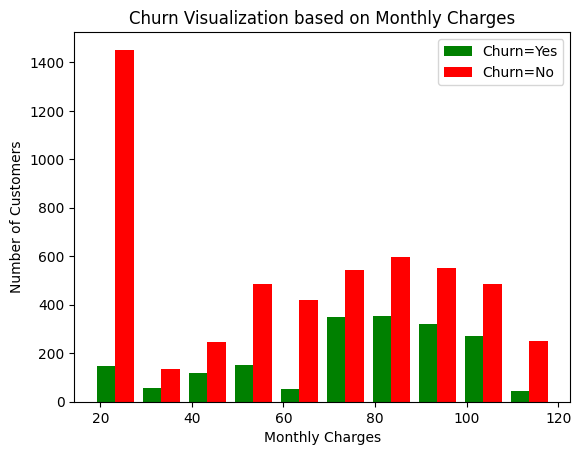

In [18]:
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Churn Visualization based on Monthly Charges')
plt.hist([monthly_charge_churn_yes , monthly_charges_churn_no] , color=['green' , 'red'] , label=['Churn=Yes' , 'Churn=No'])
plt.legend()

In [19]:
#### function to find all the categorical columns with there unique values

def unique_cat_values(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [20]:
unique_cat_values(df_final)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
## firstly we replace all the no internet service and no phone service with no
df_final.replace('No internet service' , 'No' , inplace=True)
df_final.replace('No phone service' , 'No' , inplace=True)

In [22]:
unique_cat_values(df_final)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
## now we convert all yes and no into 1 and 0
yes_no_cols = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 
              'PaperlessBilling' , 'Churn']
for i in yes_no_cols:
    df_final[i].replace({'Yes':1 , 'No':0} , inplace=True)

C:\Users\Kushagra\AppData\Local\Temp\ipykernel_9248\4220823208.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[i].replace({'Yes':1 , 'No':0} , inplace=True)
C:\Users\Kushagra\AppData\Local\Temp\ipykernel_9248\4220823208.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[i].rep

In [24]:
for col in df_final:
    print(f'{col} : {df_final[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [25]:
## Now we see above that all yes/no are converted into 1/0

In [26]:
unique_cat_values(df_final)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [27]:
df_final['gender'].replace({'Female':1 , 'Male':2} , inplace=True)

C:\Users\Kushagra\AppData\Local\Temp\ipykernel_9248\2229436168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['gender'].replace({'Female':1 , 'Male':2} , inplace=True)
C:\Users\Kushagra\AppData\Local\Temp\ipykernel_9248\2229436168.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_

In [28]:
unique_cat_values(df_final)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [29]:
### Now doing one hot ewncoding of all three remaining columns
df_final = pd.get_dummies(df_final , columns=['InternetService' , 'Contract' , 'PaymentMethod'])

In [30]:
df_final.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
df_final.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [32]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,2,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,2,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,2,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [33]:
# Now we need to scale the columns = tenure , monthly charges and total charges

scaling_columns = [['tenure' , 'MonthlyCharges' , 'TotalCharges']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in scaling_columns:
    df_final[i] = scaler.fit_transform(df_final[i])

In [34]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,2,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,2,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,2,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


# Data Cleaning finally done

In [35]:
## Creating Independent and Dependent Features
X = df_final.drop(['Churn'] , axis=1)
y = df_final['Churn']

In [36]:
## Training and Testing Split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state = 0)

In [37]:
from keras.models import Sequential                 ## sequential library is the key to  make any typeof neurlalnetwork( ANN , CNN , etc)
from keras.layers import Dense                      ## dense layers is used to create input layer , any hidden layers and output layer
from keras.layers import ReLU , LeakyReLU , PReLU   ## layers import the activn. func.
from keras.layers import Dropout                    ## .layers also imports the dropout layer

In [38]:
classifier = Sequential()

In [39]:
### Adding 1st layer which is nohting but our inputt layer and our first hidden layer
classifier.add(Dense(units = 6 , kernel_initializer = 'he_uniform' , activation='relu' , input_dim=26))

## units=6 means 6 hidden neuron , kernel_initializer(it is a weight initializatio technique written in my notes , can be he_normal , glorot uniform or glorot normal) is he_uniform , activaltion is relu(can be prelu or elu depending on us) , input_dim means no.of input features which are 26 in this case.

In [40]:
## now we add second hidden layer
classifier.add(Dense(units=6 , activation='elu' , kernel_initializer='he_normal' , ))

In [41]:
## adding third hidden layer
classifier.add(Dense(units=5 , activation='relu' , kernel_initializer='glorot_uniform'))

In [42]:
## adding the output layer
classifier.add(Dense(units=1 , activation='sigmoid' , kernel_initializer='glorot_normal'))

## units=1 becoz of binary classification and reason for loss=binary_crossentropy

In [43]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 162       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 5)                 35        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [44]:
## Now we compile our ANN model
classifier.compile(optimizer = 'adam' , loss='binary_crossentropy' , metrics=['accuracy'])
## metrics=accuracy as we are solving a classificn. problem

In [45]:
### Now at this point we split our training data into traing and validation data so that our testing data remains untouched

X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=0.20 , random_state=42)

In [46]:
# Ensure arrays are NumPy arrays
X_train = np.array(X_train, dtype=np.float32)
X_val   = np.array(X_val, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_val   = np.array(y_val, dtype=np.int32)
X_test  = X_test.astype('float32')
y_test  = y_test.astype('int32')

In [47]:
## mandatory step to check GPU support with tensorflow
import tensorflow as tf
print(tf.config.list_physical_devices("GPU"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [48]:
## Now training our modelby givin it the required dataset

model = classifier.fit(X_train , y_train , batch_size=32 , validation_data=(X_val , y_val)  ,epochs=100)

Epoch 1/100
118/118 [==============================] - 2s 7ms/step - loss: 0.6000 - accuracy: 0.7022 - val_loss: 0.5520 - val_accuracy: 0.7328
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 0.5230 - accuracy: 0.7362 - val_loss: 0.4920 - val_accuracy: 0.7466
Epoch 3/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4652 - accuracy: 0.7686 - val_loss: 0.4544 - val_accuracy: 0.7678
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4422 - accuracy: 0.7848 - val_loss: 0.4466 - val_accuracy: 0.7773
Epoch 5/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4328 - accuracy: 0.7954 - val_loss: 0.4428 - val_accuracy: 0.7762
Epoch 6/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4269 - accuracy: 0.7954 - val_loss: 0.4413 - val_accuracy: 0.7847
Epoch 7/100
118/118 [==============================] - 1s 5ms/step - loss: 0.4232 - accuracy: 0.7996 - val_loss: 0.4385 - val_accuracy: 0.7815

In [49]:
### prediction using test set
y_pred = classifier.predict(X_test)
y_pred = ( y_pred > 0.5 )
y_pred

73/73 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
y_test

5561    0
5814    0
2645    0
3983    1
6438    1
       ..
6069    0
2773    0
1181    1
5886    0
2559    0
Name: Churn, Length: 2321, dtype: int32

In [51]:
## Now we check the accuracy of our prediction
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)
score

0.7992244722102542

In [52]:
### Now i want to increase the accuracvy by adding dropout layer and using the concept of Early Stopping

classifier_improved = Sequential()

# input layer and first hidden layer 
classifier_improved.add(Dense(units=7 , activation='relu' , kernel_initializer = 'he_uniform' , input_dim=26))
classifier_improved.add(Dropout(0.20))

# second hidden layer
classifier_improved.add(Dense(units=6 , activation='elu' , kernel_initializer='he_normal'))
classifier_improved.add(Dropout(0.20))
# third hidden layer with drpout abd PReLU
classifier_improved.add(Dense(units=6 , activation='relu' , kernel_initializer='he_normal'))
classifier_improved.add(Dropout(0.20))
classifier_improved.add(PReLU())

# output layer
classifier_improved.add(Dense(units=1 , activation='sigmoid' , kernel_initializer='glorot_uniform'))

In [53]:
## Now we will comple the improved ANN
classifier_improved.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [54]:
## Here we also use the concept of early stopping , where our model training stops if their is no significant increase in the accuracy

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [55]:
## Training Improved Model witrh Dropout Layer and Early STopping
model_improved = classifier_improved.fit(X_train , y_train , validation_data=(X_val , y_val) , batch_size=32 , epochs=100 , callbacks = [early_stopping])
## early_stopping defined inside our callbacks function

Epoch 1/100
118/118 [==============================] - 1s 7ms/step - loss: 0.6297 - accuracy: 0.6085 - val_loss: 0.5117 - val_accuracy: 0.7317
Epoch 2/100
118/118 [==============================] - 1s 6ms/step - loss: 0.5686 - accuracy: 0.7054 - val_loss: 0.4875 - val_accuracy: 0.7328
Epoch 3/100
118/118 [==============================] - 1s 6ms/step - loss: 0.5329 - accuracy: 0.7285 - val_loss: 0.4725 - val_accuracy: 0.7328
Epoch 4/100
118/118 [==============================] - 1s 6ms/step - loss: 0.5243 - accuracy: 0.7341 - val_loss: 0.4657 - val_accuracy: 0.7328
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 0.5145 - accuracy: 0.7434 - val_loss: 0.4617 - val_accuracy: 0.7423
Epoch 6/100
118/118 [==============================] - 1s 6ms/step - loss: 0.5081 - accuracy: 0.7434 - val_loss: 0.4572 - val_accuracy: 0.7444
Epoch 7/100
118/118 [==============================] - 1s 6ms/step - loss: 0.4851 - accuracy: 0.7588 - val_loss: 0.4523 - val_accuracy: 0.7635

In [56]:
## Doing prediction with new model

y_pred_improved = classifier_improved.predict(X_test)
y_pred_improved = (y_pred_improved > 0.5)
y_pred_improved

73/73 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [57]:
improved_score = accuracy_score(y_pred_improved , y_test)
improved_score

0.8013787160706592

In [58]:
print("Old accuracy :" , score)
print("Improved accuracy :" , improved_score)

Old accuracy : 0.7992244722102542
Improved accuracy : 0.8013787160706592


In [59]:
### Now we make confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)
cm

array([[1535,  165],
       [ 301,  320]], dtype=int64)

In [60]:
cm_improved = confusion_matrix(y_test , y_pred_improved)
cm_improved

array([[1557,  143],
       [ 318,  303]], dtype=int64)